<h2>2<sup>η</sup> ΕΡΓΑΣΤΗΡΙΑΚΗ ΑΣΚΗΣΗ</h2>
<h3>Ανάλυση Κοινωνικής Δομής σε Τεχνητές και Πραγματικές Σύνθετες Τοπολογίες Δικτύων</h3>
<p style=text-align:justify>Στην παρούσα άσκηση θα αναλυθούν τεχνητές και πραγματικές τοπολογίες σύνθετων δικτύων με βάση τις τεχνικές που χρησιμοποιήθηκαν στην προηγούμενη άσκηση και κάποιες επιπρόσθετες, με στόχο την εύρεση κοινωνικής δομής. Συγκεκριμένα, θα χρησιμοποιηθούν και θα συγκριθούν διάφοροι αλγόριθμοι εντοπισμού κοινοτήτων σε γράφους δικτύων που προκύπτουν από πραγματικά δεδομένα καθώς και στους συνθετικούς γράφους της πρώτης εργαστηριακής άσκησης.</p>

In [1]:
%matplotlib inline

import matplotlib
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from sklearn.cluster import SpectralClustering

# Colors
from matplotlib import colors as mcolors
colors = list(dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS).keys())

<h3>Α. Μελέτη πραγματικών τοπολογιών</h3>
<p style=text-align:justify>Στο παρόν ερώτημα θα μελετήσετε και θα αποκτήσετε αίσθηση της τοπολογικής δομής πραγματικών δικτύων και της πολυπλοκότητας ανάλυσης που ανακύπτει. Πιο συγκεκριμένα, για τις τοπολογίες που φαίνονται στον <b>πίνακα 1</b>, να βρεθούν και να δειχθούν:</p>
<ol>
    <li>Ο βαθμός κάθε κόμβου και ο μέσος βαθμός κάθε τοπολογίας.</li>
    <li>Ο συντελεστής ομαδοποίησης κάθε κόμβου και ο μέσος συντελεστής ομαδοποίησης κάθε τοπολογίας.</li>
    <li>Την ενδιαμεσική εγώκεντρικότητα κάθε κόμβου και τη μέση ενδιαμεσική εγωκεντρικότητα.</li>
</ol>
<p style=text-align:justify>Να συγκριθούν τα αποτελέσματα σε σχέση με αυτά των συνθετικών τοπολογιών. Να χαρακτηρίσετε τον τύπο κάθε μίας από τις πραγματικές τοπολογίες με βάση τους τύπους δικτύων που εξετάστηκαν στην πρώτη εργαστηριακή άσκηση.</p>
<p style=text-align:justify><b>Προσοχή!</b> Θα πρέπει να ελέγξετε αν οι γράφοι είναι κατευθυνόμενοι, δηλ. οι αντίστοιχοι πίνακες γειτνίασης είναι μη συμμετρικοί. Στην περίπτωση αυτή, θα πρέπει να τους μετατρέψετε σε μη-κατευθυνόμενους με τουλάχιστον το ίδιο πλήθος συνδέσεων, <b>προτού</b> εφαρμόσετε τους αλγόριθμους εντοπισμού κοινοτήτων του <b>πίνακα 2</b>. </p>

<table style=width:100%>
    <caption>Πίνακας <b>1</b>: Πραγματικές τοπολογίες από την ιστοσελίδα <a style=text-decoration:none href="http://www-personal.umich.edu/~mejn/netdata/">http://www-personal.umich.edu/~mejn/netdata/</a> </caption>
<tr>
    <th style=text-align:left>Τοπολογία</th>
    <th style=text-align:left>Αρχείο</th>
    <th style=text-align:left>Περιγραφή</th>
</tr>
<tr>
    <td style=text-align:left>American College Football</td>
    <td style=text-align:left><a style=text-decoration:none href='http://www-personal.umich.edu/~mejn/netdata/football.zip'>football.gml</a></td>
    <td style=text-align:left><p style=text-align:justify> The file <b>football.gml</b> contains the network of American football games between Division IA colleges during regular season Fall 2000, as compiled by M. Girvan and M. Newman. The nodes have values that indicate to which conferences they belong.</p>
    </td>
</tr>
<tr>
    <td style=text-align:left>Les Miserables</td>
    <td style=text-align:left><a style=text-decoration:none href='http://www-personal.umich.edu/~mejn/netdata/lesmis.zip'>lesmis.gml</a></td>
    <td style=text-align:left><p style=text-align:justify> The file <b>lesmis.gml</b> contains the weighted network of coappearances of
characters in Victor Hugo's novel "Les Miserables".  Nodes represent characters as indicated by the labels and edges connect any pair of characters that appear in the same chapter of the book.  The values on the edges are the number of such coappearances.  The data on coappearances were taken from D. E. Knuth, The Stanford GraphBase: A Platform for Combinatorial Computing, Addison-Wesley, Reading, MA (1993)</p>
    </td>
</tr>  
<tr>
    <td style=text-align:left>Dolphin social network</td>
    <td style=text-align:left><a style=text-decoration:none href='http://www-personal.umich.edu/~mejn/netdata/dolphins.zip'>dolphins.gml</a></td>
    <td style=text-align:left><p style=text-align:justify> The file <b>dolphins.gml</b> contains an undirected social network of frequent associations between 62 dolphins in a community living off Doubtful Sound, New Zealand, as compiled by Lusseau et al. (2003)</p>
    </td>
</tr> 
</table>

<h4>1. Παραγωγή συνθετικών τοπολογιών</h4> 

In [2]:
n=100
d=4
M=750
R=0.15
p=0.3
k=4


REG = nx.watts_strogatz_graph(n,d,0)
RGER = nx.gnm_random_graph(n, M)

#we need to ensure connectivity for spectral clustering to work
RGG = nx.random_geometric_graph(n, R)
while nx.is_connected(RGG)==False:
    RGG = nx.random_geometric_graph(n, R)
    
SF = nx.barabasi_albert_graph(n, d)
SW = nx.watts_strogatz_graph(n,k,p)

<h4>2. Εισαγωγή και οπτικοποίηση πραγματικών τοπολογιών.</h4>

In [3]:
#import football.gml from local file using nx.read_gml

football = nx.read_gml("football.gml")

In [4]:
#check if football is directed

print(nx.is_directed(football))

False


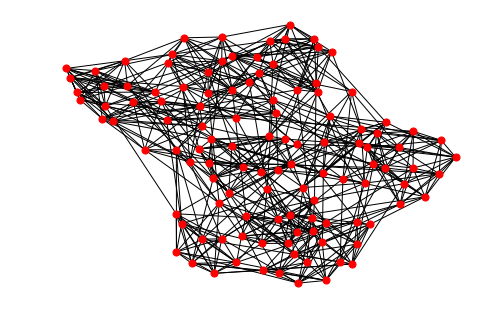

In [5]:
#visualize football
# nx.draw(football,node_size=50)

nx.draw(football,node_size=50)

In [6]:
#import lesmis.gml

lesmis = nx.read_gml("lesmis.gml")

In [7]:
#check if lesmis is directed
print(nx.is_directed(lesmis))

False


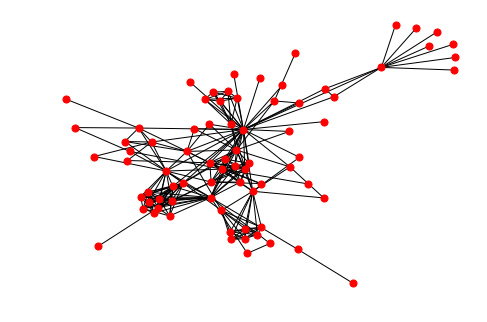

In [8]:
#visualize lesmis

nx.draw(lesmis,node_size=50)

# nx.draw_kamada_kawai(lesmis,node_size=50)

In [9]:
#import dolphins.gml

dolphins = nx.read_gml("dolphins.gml")

In [10]:
#check if dolphins is directed
print(nx.is_directed(dolphins))

False


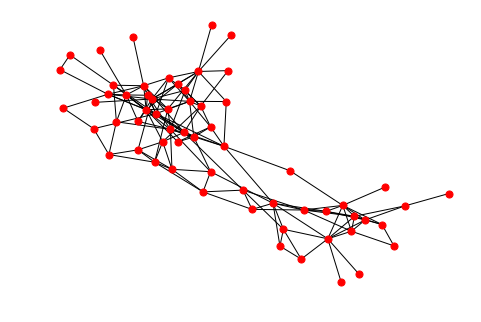

In [11]:
#visualize dolphins
nx.draw(dolphins, node_size = 50)

In [12]:
#convert nodes' labels from strings to integers in real topologies
def conv2int(G,start_value):
    nG = nx.convert_node_labels_to_integers(G,first_label=start_value)
    G_mapping=dict(enumerate(G.nodes,0))
    return nG,G_mapping

nfootball,football_map=conv2int(football,0)
nlesmis, lesmis_map=conv2int(lesmis,0)
ndolphins, dolphins_map=conv2int(dolphins,0)

print(nfootball)

#G=nx.relabel_nodes(nG,G_mapping)

In [13]:
graphs = [REG, RGER, RGG, SF, SW, nfootball, nlesmis, ndolphins]
names = ['REG', 'RGER', 'RGG', 'SF', 'SW', 'football', 'lesmis', 'dolphins']


T = len(names) #number of topologies

<h4>3. Μελέτη βαθμού κόμβου για πραγματικές και συνθετικές τοπολογίες.</h4>

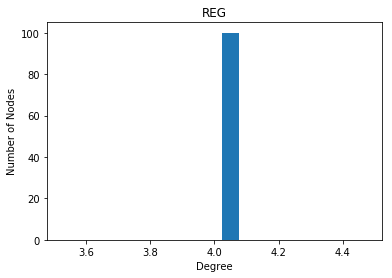

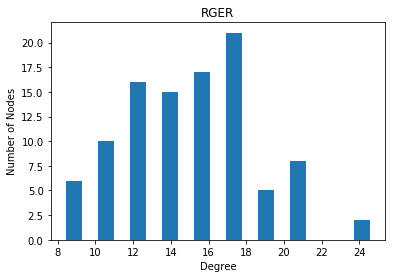

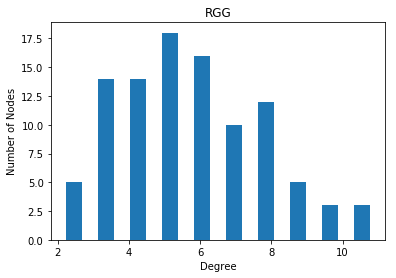

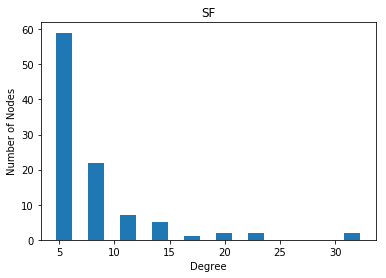

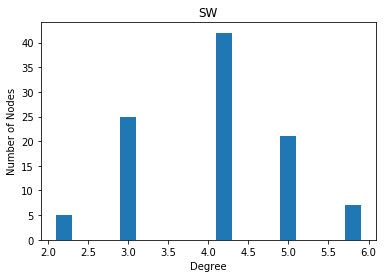

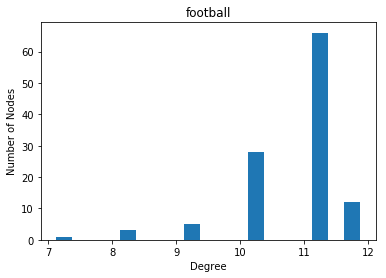

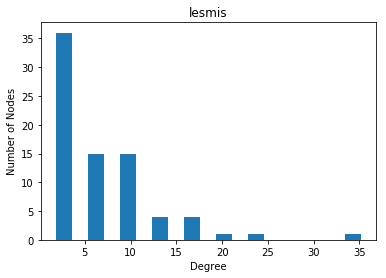

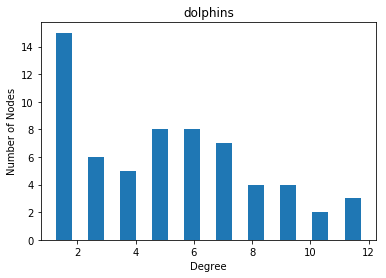

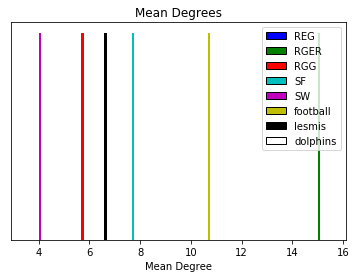

In [14]:
def find_degree(G):
    return G.degree()


degrees = []
for g in graphs:
    degrees.append(find_degree(g))

def degree_hist(G_degree,Gname):
    plt.xlabel("Degree")
    plt.ylabel("Number of Nodes")
    plt.hist(list(dict(G_degree).values()), rwidth = 0.5)
    plt.title(Gname)
    plt.show()

# Mean Degrees
for i in range(0, T):
    degree_hist(degrees[i],names[i])

mean_degrees = []
for i in range(0, T):
    mean_degrees.append(np.mean(list(dict(degrees[i]).values())))


#create legend
from matplotlib.patches import Rectangle

handles = [Rectangle((0,0),1,1,color=colors[i],ec="k") for i in range(0, T)]
labels= names
plt.legend(handles, labels)

plt.xlabel("Mean Degree")
for i in range(0, T):
    plt.hist(mean_degrees[i], color = colors[i])
plt.title('Mean Degrees')
plt.yticks([], []) # no y ticks
plt.show()
    

In [15]:
for i in range(0, T):
    print(names[i],": Mean degree is:", mean_degrees[i])

REG : Mean degree is: 4.0
RGER : Mean degree is: 15.0
RGG : Mean degree is: 5.68
SF : Mean degree is: 7.68
SW : Mean degree is: 4.0
football : Mean degree is: 10.660869565217391
lesmis : Mean degree is: 6.597402597402597
dolphins : Mean degree is: 5.129032258064516


<h4>4. Μελέτη συντελεστή ομαδοποίησης για πραγματικές και συνθετικές τοπολογίες</h4>

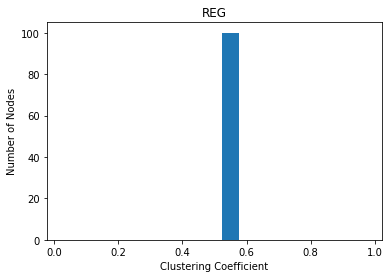

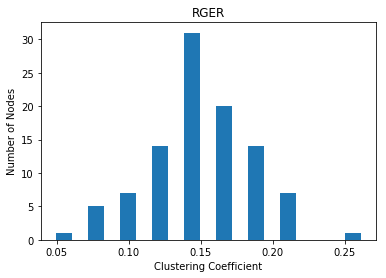

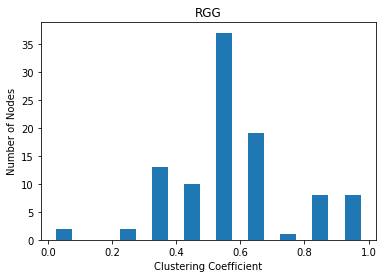

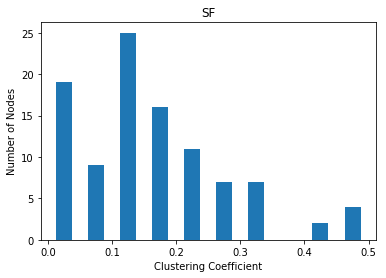

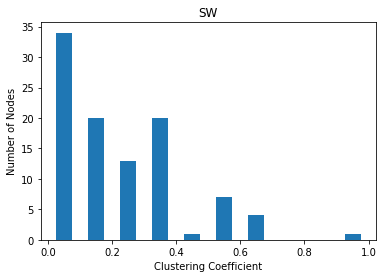

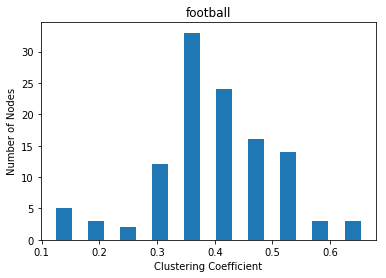

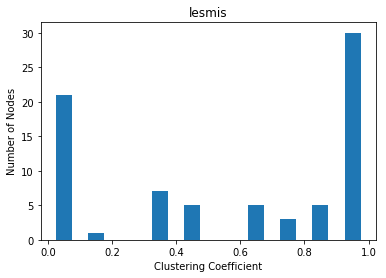

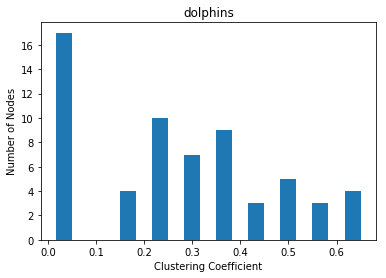

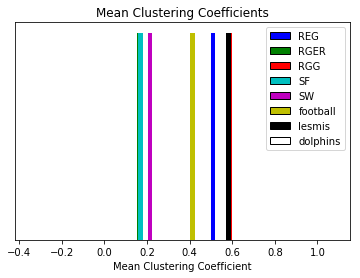

In [16]:
def clust_coef(G):
    return nx.clustering(G)

CCs = []
for g in graphs:
    CCs.append(clust_coef(g))

def cc_hist(G_cc, Gname):
    plt.xlabel("Clustering Coefficient")
    plt.ylabel("Number of Nodes")
    plt.hist(list(dict(G_cc).values()), rwidth=0.5)
    plt.title(Gname)
    plt.show()
    
for i in range(0,T):
    cc_hist(CCs[i], names[i])
    
    
# Mean CC
mean_cc = []
for i in range(0, T):
    mean_cc.append(np.mean(list(dict(CCs[i]).values())))

#create legend
handles = [Rectangle((0,0),1,1,color=colors[i],ec="k") for i in range(0, T)]
labels= names
plt.legend(handles, labels)

plt.xlabel("Mean Clustering Coefficient")
for i in range(0, T):
    plt.hist(mean_cc[i], color = colors[i], width = 0.02)
plt.title('Mean Clustering Coefficients')
plt.yticks([], []) # no y ticks
plt.show()


In [17]:
for i in range(0, T):
    print(names[i],": Mean CC is:", mean_cc[i])

REG : Mean CC is: 0.5
RGER : Mean CC is: 0.15081227727194213
RGG : Mean CC is: 0.5803499278499279
SF : Mean CC is: 0.15930400673121764
SW : Mean CC is: 0.2046666666666666
football : Mean CC is: 0.40321601104209803
lesmis : Mean CC is: 0.5731367499320135
dolphins : Mean CC is: 0.2589582460550202


<h4>5. Μελέτη ενδιαμεσικής εγω-κεντρικότητας για πραγματικές και συνθετικές τοπολογίες </h4>

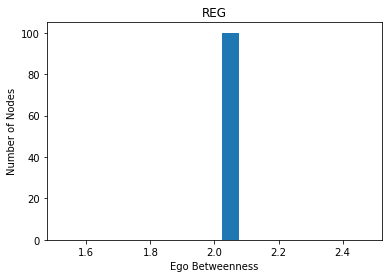

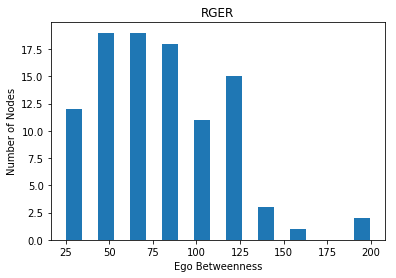

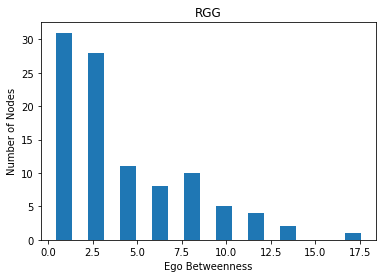

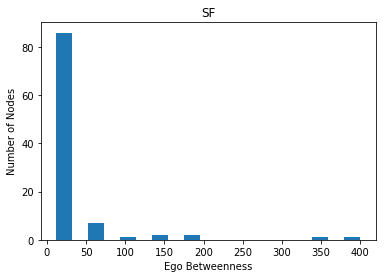

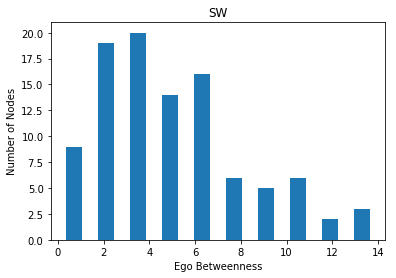

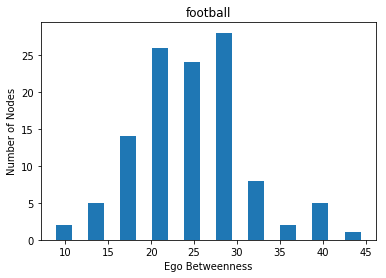

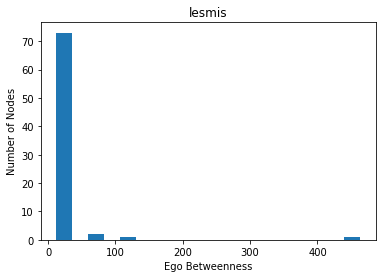

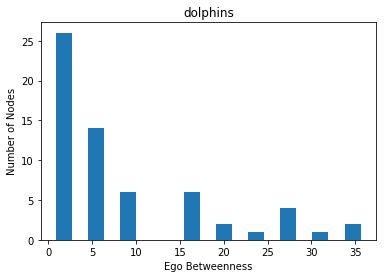

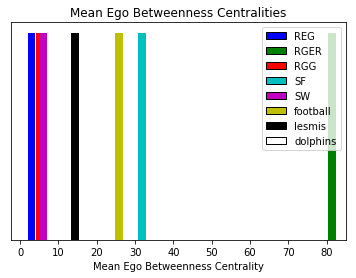

In [18]:
def ego_centrality(topology): #ego betweeness centrality
    result = []
    result2 = {}
    for v in topology.nodes():
        A = nx.adjacency_matrix(nx.ego_graph(topology,v)).todense()
        k = A.shape[0]
        A_squared = np.linalg.matrix_power(A,2)
        invA = np.ones((k,k))-A
        G =  np.triu(np.multiply(A_squared,invA),1)
        l = G[np.nonzero(G)]
        temp_result = sum([1/x for x in list(l)])
#         result.append(temp_result)
        # aDict[key] = value
        result2[v] = temp_result
    return result2

EBCs = [] #Ego Betweenness Centralities
for g in graphs:
    EBCs.append(ego_centrality(g))


def egobtw_hist(G_ebtw,Gname): 
    plt.xlabel("Ego Betweenness")
    plt.ylabel("Number of Nodes")
    plt.hist(list(dict(G_ebtw).values()), rwidth = 0.5)
    plt.title(Gname)
    plt.show()

for i in range(0,T):
    egobtw_hist(EBCs[i], names[i])

    
# Mean EBC

mean_ebc = []
for i in range(0, T):
    mean_ebc.append(np.mean(list(dict(EBCs[i]).values())))
    
#create legend
handles = [Rectangle((0,0),1,1,color=colors[i],ec="k") for i in range(0, T)]
labels= names
plt.legend(handles, labels)

plt.xlabel("Mean Ego Betweenness Centrality")
for i in range(0, T):
    plt.hist(mean_ebc[i], color = colors[i], width = 2)
plt.title('Mean Ego Betweenness Centralities')
plt.yticks([], []) # no y ticks
plt.show()


In [19]:
for i in range(0, T):
    print(names[i],": Mean EBC is:", mean_ebc[i])

REG : Mean EBC is: 2.0
RGER : Mean EBC is: 80.46933333333332
RGG : Mean EBC is: 4.117
SF : Mean EBC is: 30.843666666666667
SW : Mean EBC is: 4.95
football : Mean EBC is: 24.722132505175978
lesmis : Mean EBC is: 13.31846011131725
dolphins : Mean EBC is: 8.517473118279568


### Σύγκριση αποτελεσμάτων

<b>Football:</b> Όσον αφορά το Clustering Coefficient, αυτό το dataset μοιάζει περισσότερο με RGG γράφο. Αφού αφορά ομάδες ποδοσφαίρου, μπορεί κανείς να δικαιολογήσει αυτό το αποτέλεσμα αν κάθε ομάδα ανήκει σε cluster σύμφωνα με την τοπικότητα (δηλαδή οι ομάδες να ανήκουν σε "conference" ανάλογα με την περιοχή στην οποία βρίσκονται, κάτι που είναι πολύ συχνό στο ποδόσφαιρο).


<b>Les miserables:</b> Στις μετρικές που αφορούν degree και ego centrality το δίκτυο φαίνεται να πρσεγγίζει συμπεριφορά Scale Free, αφού υπάρχουν λίγοι "δημοφιλείς" κόμβοι (υψηλό degree) και πολλοί με χαμηλό. Το γεγονός αυτό είναι δικαιολογημένο αν σκεφτούμε ότι το dataset αφορά εμφανίσεις χαρακτήρων (ανθρώπινες συναναστροφές).

<b>Dolphins:</b> Παρατηρούμε ότι το συγκεκριμένο δίκτυο παραουσιάζει συμπεριφορά που κυμαίνεται ανάμεσα σε Small World τοπολογία, Scale Free και RGG, αν και η Small World μάλλον την προσεγγίζει καλύτερα. Αν σκεφτούμε ότι το dataset αυτό αφορά συναναστροφές δελφινιών, το αποτέλεσμα είναι λογικό.

<b>Σημείωση:</b> Επειδή έχουμε πραγματικές τοπολογίες, δεν περιμένουμε να έχουμε απόλυτη ταύτιση με τους συνθετικούς γράφους. Απλώς κοιτάμε αν υπάρχουν κάποια κοινά βασικά χαρακτηριστικά. Για παράδειγμα, ο τρόπος που συναναστρέφονται τα μέλη μιας ομάδας δελφινιών δε θα διέπεται από τα ίδια χαρακτηριστικά που έχει μια ομάδα ανθρώπων ή μια θεωρητική Small world τοπολογία.

<h3>B. Εξοικείωση με τα εργαλεία εντοπισμού κοινοτήτων</h3>
<p>Χρησιμοποιώντας τις συναρτήσεις του <b>πίνακα 2</b> για κάθε <u>πραγματικό</u> (<b>πίνακας 1</b>) και <u>συνθετικό</u> (από την <b>άσκηση 1</b>) δίκτυο:</p>
<ol>
    <li>να οπτικοποιηθούν οι κοινότητες που προκύπτουν από την κάθε μέθοδο</li>
    <li>να γίνουν οι απαραίτητοι σχολιασμοί (π.χ: σύγκριση του αριθμού των κοινοτήτων που υπολογίζει ο κάθε αλγόριθμος).</li>
</ol>
<p>Για την οπτικοποίηση, να επισημανθεί διαφορετικά κάθε κοινότητα, π.χ. με διαφορετικό χρώμα.</p>
<p style=text-align:justify>Στην περίπτωση των συνθετικών δικτύων, να πραγματοποιηθούν συγκρίσεις και μεταξύ των διαφορετικών τύπων τοπολογιών. Για παράδειγμα, στην περίπτωση του τυχαίου γεωμετρικού γράφου, υπάρχει διαισθητικά μία κοινότητα γύρω από κάθε κόμβο που δημιουργείται με βάση τις αποστάσεις του τελευταίου από τους υπόλοιπους κόμβους του δικτύου. Στην περίπτωση των scale-free δικτύων, είναι πιθανό να σχηματίζονται κοινότητες γύρω από τους κόμβους με μεγάλο βαθμό.</p>
<p>Για κάθε αλγόριθμο εντοπισμού κοινοτήτων και για κάθε τοπολογία υπολογίστε το modularity χρησιμοποιώντας τη συνάρτηση <a style=text-decoration:none href='https://networkx.github.io/documentation/latest/reference/algorithms/generated/networkx.algorithms.community.quality.performance.html#networkx.algorithms.community.quality.performance'>performance</a>.</p>

<table style=float:left;width:70%>
    <caption>Πίνακας <b>2</b>: Συναρτήσεις εντοπισμού κοινοτήτων</caption>
    <tr>
        <th style=text-align:left> Μέθοδος εντοπισμού κοινοτήτων</th>
        <th style=text-align:left>Συνάρτηση</th>
    </tr>
    <tr>
        <td style=text-align:left>Spectral Clustering</td>
        <td style=text-align:left><a style=text-decoration:none href='http://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html'>SpectralClustering</a></td>
    </tr>
       <tr>
        <td style=text-align:left>Newman-Girvan</td>
        <td style=text-align:left><a style=text-decoration:none                               href='https://networkx.github.io/documentation/latest/reference/algorithms/generated/networkx.algorithms.community.centrality.girvan_newman.html'>girvan_newman</a></td>
    </tr>
    <tr>
        <td style=text-align:left>Modularity Maximization</td>
        <td style=text-align:left><a style=text-decoration:none                               href='https://networkx.github.io/documentation/latest/reference/algorithms/generated/networkx.algorithms.community.modularity_max.greedy_modularity_communities.html'>greedy_modularity_communities</a></td>
    </tr>
</table>
    

<p style=text-align:justify>Προτού εφαρμόσετε τις συναρτήσεις εντοπισμού κοινοτήτων μελετήστε προσεκτικά την <b>είσοδο που απαιτούν καθώς και τη μορφή εξόδου που παράγουν.</b></p>

<h4>1. Ορισμός χρωμάτων για την οπτικοποίηση των κοινοτήτων.</h4>

In [20]:
#insert colors for nodes
from matplotlib import colors as mcolors
colors = list(dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS).keys())

<h4>2. Εντοπισμός κοινοτήτων σε συνθετικά και πραγματικά δίκτυα με τη μέθοδο Newman-Girvan.</h4>

In [21]:
#girvan_newman:partitions of at most k=50 communities, select the one with the highest value of modularity.
#use nx.algorithms.community.centrality.girvan_newman for the communities
#nx.algorithms.community.quality.performance to measure modularity

import itertools

k=50 # maximun # of communities

def comd_GN(G,k,Gname):
    
    comp = nx.algorithms.community.centrality.girvan_newman(G)
    limited = itertools.takewhile(lambda c: len(c) <= k, comp)
    com_history = []
    
    max_performance = -1
    
    for communities in limited:
        com_history.append(tuple(sorted(c) for c in communities))    
        
        #Find the the community map with the highest performance===================================
        
        #We have to choose the community map with the highest performance
        last_com = com_history[-1] #last element
        perf =  nx.algorithms.community.quality.performance(G, last_com)
        
        #We keep the community map with the highest performance
        if max_performance < perf:
            max_performance = perf
            com = last_com  
        #===========================================================================================
#     print(max_performance) 
#     print(last_com)
    print(Gname,": Performance =",max_performance,"με k =", len(com))
    return com


print("Μέθοδος Girvan-Newman \n")
REG_GN = comd_GN(REG,k,"REG")
RGER_GN = comd_GN(RGER,k,"RG(ER)")
RGG_GN = comd_GN(RGG,k,"RGG")
SF_GN = comd_GN(SF,k,"SF")
SW_GN = comd_GN(SW,k,"SW")
nfootball_GN = comd_GN(nfootball,k,"football")
nlesmis_GN = comd_GN(nlesmis,k,"lesmis")
ndolphins_GN = comd_GN(ndolphins,k,"dolphins")


Μέθοδος Girvan-Newman 

REG : Performance = 0.9797979797979798 με k = 32
RG(ER) : Performance = 0.7385858585858586 με k = 50
RGG : Performance = 0.9717171717171718 με k = 26
SF : Performance = 0.9292929292929293 με k = 50
SW : Performance = 0.9749494949494949 με k = 36
football : Performance = 0.9581998474446987 με k = 17
lesmis : Performance = 0.9630895420369104 με k = 32
dolphins : Performance = 0.9439450026441036 με k = 27


<h4>3. Εντοπισμός κοινοτήτων σε συνθετικά και πραγματικά δίκτυα με τη μέθοδο Spectral Clustering.</h4>

In [23]:
#Spectral Clustering:all partitions of k={1,..50} communities
#use SpectralClustering for the communities
#nx.algorithms.community.quality.performance to measure modularity

def comd_SP(G,Gname):
    max_perf = -1
    best_k = 0
    for k in range(1,51):
        adj_mat = nx.adjacency_matrix(G, weight=False)
        spectral = SpectralClustering(n_clusters=k, eigen_solver='arpack',affinity="precomputed").fit(adj_mat) 
        com_list = list(spectral.labels_)
        
        com = [[] for i in range(k)]
        for node in range(0, len(com_list)): # len(com_list) = n
            com[com_list[node]].append(node)      # στη θέση node του com_list υπάρχει ο αριθμός της κοινότητας στην οποία ανήκει ο κόμβος node. Οπότε τώρα φτιάχνουμε το com το οποίο περιέχει λίστες (κοινότητες) οι οποίες περιέχουν τους κόμβους που ανήκουν σε κάθε κοινότητα.     

#         # OR:::
#         i=0
#         for v in com_list:
#             com[v].append(i)
#             i = i+1
        
#         print(com)
#         com == ([0], [19], [20], [21], [22], [23], [24, 29, 45, 51], [25, 26, 27], [28], [30], [31], [32, 60], [33, 37, 43], [34], [35], [36], [38], [39], [40], [41, 57], [42, 47], [59], ktl...)

        perf =  nx.algorithms.community.quality.performance(G, com)
        if perf > max_perf:
            max_perf = perf
            best_k = k
            best_com = com
    print(Gname,": Performance =",max_perf,"με k =", best_k)
    return best_com
        


In [24]:
print("Μέθοδος Spectral Clustering \n")
REG_SP = comd_SP(REG,"REG")
RGER_SP = comd_SP(RGER,"RG(ER)")
RGG_SP = comd_SP(RGG,"RGG")
SF_SP = comd_SP(SF,"SF")
SW_SP = comd_SP(SW,"SW")
nfootball_SP = comd_SP(nfootball, "football")
nlesmis_SP = comd_SP(nlesmis,"lesmis")
ndolphins_SP = comd_SP(ndolphins,"dolphins")

Μέθοδος Spectral Clustering 

REG : Performance = 0.9795959595959596 με k = 28
RG(ER) : Performance = 0.8597979797979798 με k = 26
RGG : Performance = 0.972929292929293 με k = 23
SF : Performance = 0.9262626262626262 με k = 47
SW : Performance = 0.9733333333333334 με k = 35
football : Performance = 0.9581998474446987 με k = 15
lesmis : Performance = 0.8991797676008202 με k = 37
dolphins : Performance = 0.9085140137493389 με k = 33


<h4>4. Εντοπισμός κοινοτήτων σε συνθετικά και πραγματικά δίκτυα με τη μέθοδο Modularity Maximization.</h4>

In [25]:
#Modularity Maximization
#use nx.algorithms.community.modularity_max.greedy_modularity_communities for the communities
#nx.algorithms.community.quality.performance to measure modularity

def comd_MM(G): 
    
    result = nx.algorithms.community.modularity_max.greedy_modularity_communities(G) #list of "frozenset" types
    
    temp = [] # result which is list of list
    for frzset in result:
        temp.append(list(frzset))
    
    return temp


MM = []
MM_perf = []
for g in graphs:
    temp = comd_MM(g) 
    MM.append(comd_MM(g))
    MM_perf.append(nx.algorithms.community.quality.performance(g, temp))
    
print("Μέθοδος Modularity Maximazation \n")
for i in range(0,T):
    print(names[i],": Performance = ",MM_perf[i],"με k =",len(MM[i]) )


REG_MM = MM[0]
RGER_MM = MM[1]
RGG_MM = MM[2]
SF_MM = MM[3]
SW_MM = MM[4]
nfootball_MM = MM[5]
nlesmis_MM = MM[6]
ndolphins_MM = MM[7]
    

Μέθοδος Modularity Maximazation 

REG : Performance =  0.7919191919191919 με k = 4
RGER : Performance =  0.731919191919192 με k = 4
RGG : Performance =  0.8456565656565657 με k = 6
SF : Performance =  0.8333333333333334 με k = 7
SW : Performance =  0.8896969696969697 με k = 8
football : Performance =  0.8681922196796339 με k = 6
lesmis : Performance =  0.815105946684894 με k = 5
dolphins : Performance =  0.7424643046007403 με k = 4


<h4>5. Οπτικοποίηση κοινοτήτων σε συνθετικά και πραγματικά δίκτυα.</h4>

In [26]:
#def visual_com:
#use from networkx: draw_networkx_nodes (and the attribute nodelist), and draw_networkx_edges

def visual_com(G,G_com,flag):
    
    # Layout type=========================================================
    if flag == 'REG':
        positions = nx.circular_layout(G)
    elif flag == 'RGER':
        positions = nx.kamada_kawai_layout(G)
    elif flag == 'RGG':
        positions = nx.get_node_attributes(G,'pos')
    elif flag == 'SF':
        positions = nx.kamada_kawai_layout(G)
    elif flag == 'SW':
        positions = nx.kamada_kawai_layout(G)
    elif flag == 'football':
        positions = nx.kamada_kawai_layout(G)
    elif flag == 'lesmis':
        positions = nx.kamada_kawai_layout(G)
    elif flag == 'dolphins':
        positions = nx.kamada_kawai_layout(G)
    else:
        positions = nx.circular_layout(G)
    #======================================================================
            

    edges = nx.draw_networkx_edges(G,pos = positions, width = 0.3, edge_color='black')

    count = 0
    for com in G_com:
        nodes = nx.draw_networkx_nodes(G,pos = positions,node_size=50, node_color =colors[count], nodelist = com)
        count = count + 1
        


<p>a. Οπτικοποίηση κοινοτήτων Les Miserables.</p>

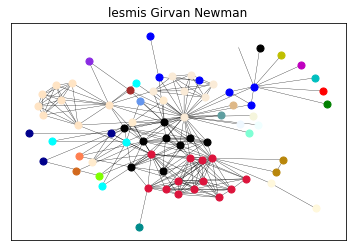

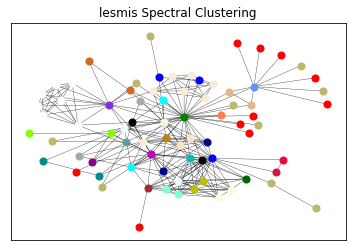

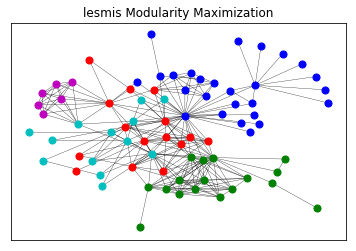

In [27]:
# Girvan Newman
visual_com(nlesmis,nlesmis_GN,'lesmis')
plt.title('lesmis Girvan Newman')

# Turn off tick labels
plt.xticks([])
plt.yticks([])

plt.show()

# Spectral Clustering
visual_com(nlesmis,nlesmis_SP,'lesmis')
plt.title('lesmis Spectral Clustering')
# Turn off tick labels
plt.xticks([])
plt.yticks([])
plt.show()


# Modularity Maximization
visual_com(nlesmis,nlesmis_MM,'lesmis')
plt.title('lesmis Modularity Maximization')

# Turn off tick labels
plt.xticks([])
plt.yticks([])

plt.show()

<p>b. Οπτικοποίηση κοινοτήτων American College Football.</p>

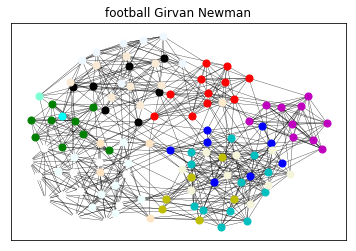

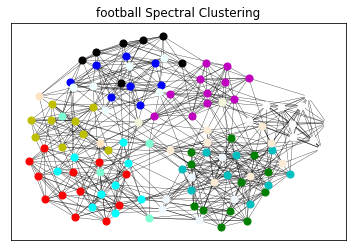

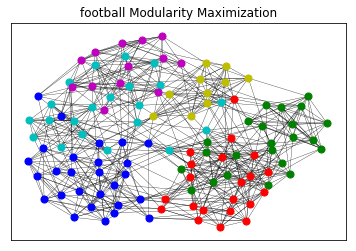

In [28]:
# Girvan Newman
visual_com(nfootball, nfootball_GN, 'football')
plt.title('football Girvan Newman')

# Turn off tick labels
plt.xticks([])
plt.yticks([])

plt.show()

# Spectral Clustering
visual_com(nfootball,nfootball_SP,'football')
plt.title('football Spectral Clustering')
# Turn off tick labels
plt.xticks([])
plt.yticks([])
plt.show()

# Modularity Maximization
visual_com(nfootball,nfootball_MM,'football')
plt.title('football Modularity Maximization')

# Turn off tick labels
plt.xticks([])
plt.yticks([])

plt.show()

<p>c. Οπτικοποίηση κοινοτήτων Dolphins.</p>

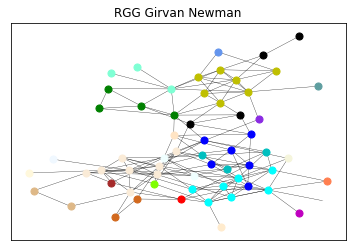

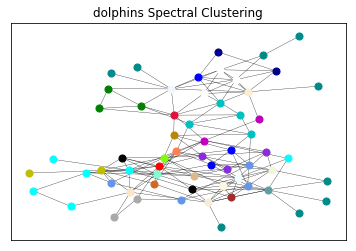

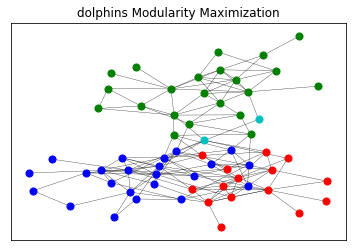

In [29]:
# Girvan Newman
visual_com(ndolphins, ndolphins_GN, 'dolphins')
plt.title('RGG Girvan Newman')

# Turn off tick labels
plt.xticks([])
plt.yticks([])

plt.show()


# Spectral Clustering
visual_com(ndolphins,ndolphins_SP,'dolphins')
plt.title('dolphins Spectral Clustering')
# Turn off tick labels
plt.xticks([])
plt.yticks([])
plt.show()


# Modularity Maximization
visual_com(ndolphins,ndolphins_MM,'dolphins')
plt.title('dolphins Modularity Maximization')

# Turn off tick labels
plt.xticks([])
plt.yticks([])

plt.show()

<p>d. Οπτικοποίηση κοινοτήτων REG.</p>

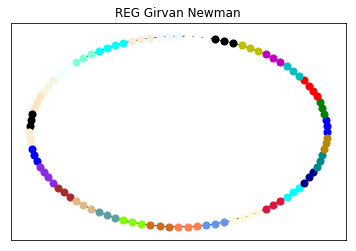

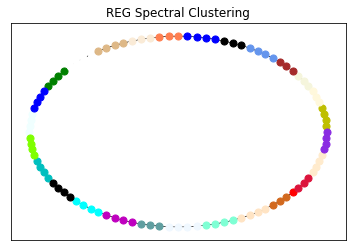

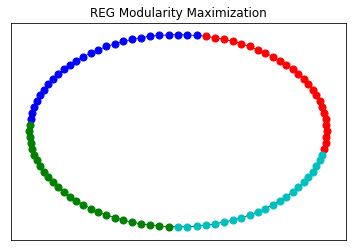

In [30]:
# Girvan Newman
visual_com(REG,REG_GN,'REG')
plt.title('REG Girvan Newman')

# Turn off tick labels
plt.xticks([])
plt.yticks([])

plt.show()


# Spectral Clustering
visual_com(REG,REG_SP,'REG')
plt.title('REG Spectral Clustering')
# Turn off tick labels
plt.xticks([])
plt.yticks([])
plt.show()



# Modularity Maximization
visual_com(REG,REG_MM,'REG')
plt.title('REG Modularity Maximization')

# Turn off tick labels
plt.xticks([])
plt.yticks([])

plt.show()

<p>e. Οπτικοποίηση κοινοτήτων RGER.</p>

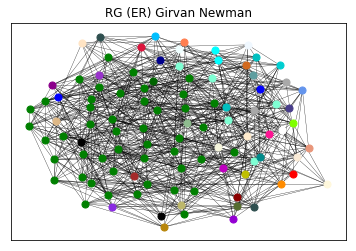

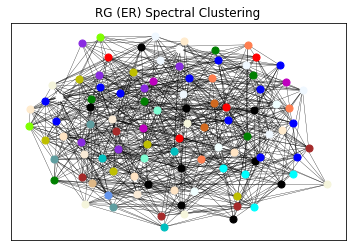

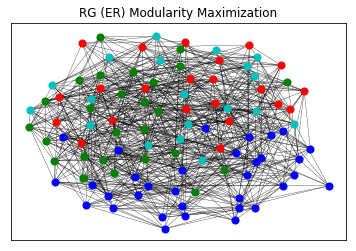

In [31]:
# Girvan Newman
visual_com(RGER,RGER_GN,'RGER')
plt.title('RG (ER) Girvan Newman')

# Turn off tick labels
plt.xticks([])
plt.yticks([])

plt.show()


# Spectral Clustering
visual_com(RGER,RGER_SP,'RGER')
plt.title('RG (ER) Spectral Clustering')
# Turn off tick labels
plt.xticks([])
plt.yticks([])
plt.show()


# Modularity Maximization
visual_com(RGER,RGER_MM,'RGER')
plt.title('RG (ER) Modularity Maximization')

# Turn off tick labels
plt.xticks([])
plt.yticks([])

plt.show()

<p>f. Οπτικοποίηση κοινοτήτων RGG.</p>

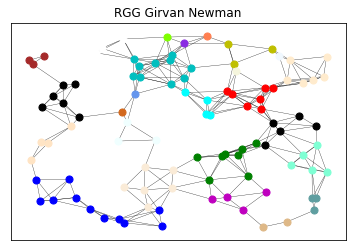

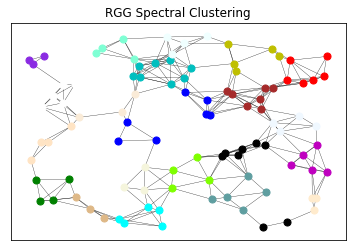

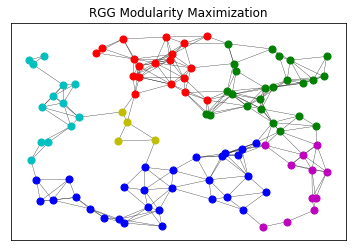

In [32]:
# Girvan Newman
visual_com(RGG,RGG_GN,'RGG')
plt.title('RGG Girvan Newman')

# Turn off tick labels
plt.xticks([])
plt.yticks([])

plt.show()


# Spectral Clustering
visual_com(RGG,RGG_SP,'RGG')
plt.title('RGG Spectral Clustering')
# Turn off tick labels
plt.xticks([])
plt.yticks([])
plt.show()


# Modularity Maximization
visual_com(RGG,RGG_MM,'RGG')
plt.title('RGG Modularity Maximization')

# Turn off tick labels
plt.xticks([])
plt.yticks([])

plt.show()

<p>g. Οπτικοποίηση κοινοτήτων SF.</p>

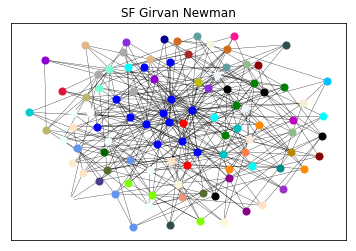

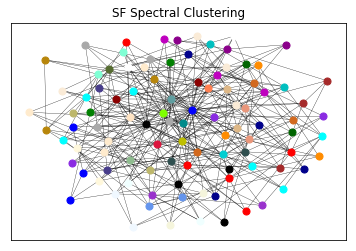

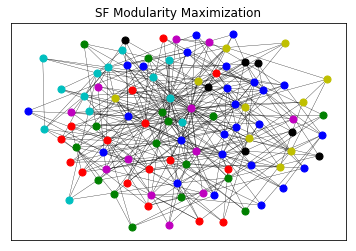

In [33]:
# Girvan Newman
visual_com(SF,SF_GN,'SF')
plt.title('SF Girvan Newman')

# Turn off tick labels
plt.xticks([])
plt.yticks([])

plt.show()



# Spectral Clustering
visual_com(SF,SF_SP,'SF')
plt.title('SF Spectral Clustering')
# Turn off tick labels
plt.xticks([])
plt.yticks([])
plt.show()

# Modularity Maximization
visual_com(SF,SF_MM,'SF')
plt.title('SF Modularity Maximization')

# Turn off tick labels
plt.xticks([])
plt.yticks([])

plt.show()

<p>h. Οπτικοποίηση κοινοτήτων SW.</p>

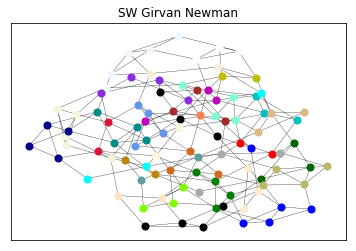

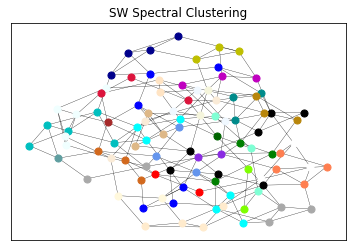

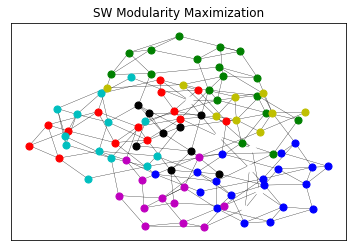

In [34]:
# Girvan Newman
visual_com(SW,SW_GN,'SW')
plt.title('SW Girvan Newman')

# Turn off tick labels
plt.xticks([])
plt.yticks([])

plt.show()


# Spectral Clustering
visual_com(SW,SW_SP,'SW')
plt.title('SW Spectral Clustering')
# Turn off tick labels
plt.xticks([])
plt.yticks([])
plt.show()


# Modularity Maximization
visual_com(SW,SW_MM,'SW')
plt.title('SW Modularity Maximization')

# Turn off tick labels
plt.xticks([])
plt.yticks([])

plt.show()

## Σχολιασμός αποτελεσμάτων

#### - Σχολιασμός ως προς το modularity (και # κοινοτήτων)

Όσον αφορά το modularity, οι αλγόριθμοι Girvan-Newman και Spectral Clustering δίνουν καλύτερα αποτελέσματα. Αυτό συμβαίνει γιατί είναι πιο εξαντλητικές και καταλήγουν σε περισσότερες κοινότητες, αλλά απαιτούν μεγαλύτερους χρόνους εκτέλεσεης. Η συνάρτηση greedy που χρησιμοποιήσαμε στην Modularity Maximazation αυξάνει την τιμή της modularity σε κάθε επανάληψη αλλά φτάνει απλά σε τοπικά μέγιστα (όχι ολικά) και σταματάει (γι'αυτό παρουσιάζει και μικρότερο αριθμό κοινοτήτων).


#### - Συγκρίσεις μεταξύ των διαφορετικών τύπων τοπολογιών

<b>Les Miserables:</b> Όπως εξηγήσαμε και σε προηγούμενο ερώτημα, αυτό το dataset παρουσιάζει συμπεριφορά παρόμοια με αυτή μιας Scale Free τοπολογίας. Στην απεικόνιση φαίνεται καθαρά η ύπαρξη κόμβων μεγάλου βαθμού γύρω από τους οποίους δημιουργούνται κοινότητες.

<b>Football:</b> Αυτό το dataset παρουσιάζει συμπεριφορά παρόμοια με αυτή μιας RGG τοπολογίας. Παρατηρούμε ότι οι κοινόητες χαρακτηρίζονται σε μεγάλο βαθμό από τοπικό χαρακτήρα.

<b>Dolphins:</b> Αυτό το dataset παρουσιάζει συμπεριφορά παρόμοια με αυτή των Small world/Scale Free/RGG, όπου σχηματίζονται κοινότητες σύμφωνα με τοπικά κριτήρια, χωρίς αυτό όμως να είναι απόλυτο.

<b>REG:</b> Όλοι οι κόμβοι είναι ισοδύναμοι. Δεν έχει νόημα ο διαχωρισμός τους σε κοινότητες, αφού δεν υπάρχει κάτι να τους διαφοροποιεί.

<b>RG(ER):</b> Ο γράφος είναι τυχαίος, επομένως δεν περιμένουμε κάποιο ιδιαίτερο μοτίβο στη συσταδοποίηση. 

<b>RGG:</b> Στον τυχαίο γεωμετικό γράφο έχουμε εξάρτηση από την απόσταση. Και στους τρεις αλγορίθμους φαίνεται αυτή η συμπεριφορά στον εντοπισμό κοινοτήτων.

<b>Scale Free:</b> Είναι εμφανής η ύπαρξη κόμβων με μεγάλο βαθμό γύρω από τους οποίους (γείτονες μερικών hop) δημιουργούνται κοινότητες.

<b>Small World:</b> Παρατηρείται μια αναμενόμενη συμπεριφιρά όπου δημιουργούνται κοινότητες σύμφωνα με μια τοπικότητα η οποία όμως διαταράσσεται σε μικρό βαθμό λόγω της ύπαρξης των κόμβων που έχουν συνδέσεις με "απομακρυσμένους" κόμβους.

<b>Σημείωση:</b> Οι πραγματικές τοπολογίες διαφέρουν πολύ από τις συνθετικές καθώς μπορεί μια πραγματική τοπολογία να συνδυάζει χαρακτηριστικά αρκετών συνθετικών αλλά και να περιγράφεται από χαρακτηριστικά που δεν παρατηρούνται στις συνθετικές. Επομένως είναι λογικό να μην υπάρχει απόλυτη κατηγοριοποίησή τους σύμμφωνα με αυτές τις πέντε συνθετικές τοπολογίες που εξετάσαμε.
